<a href="https://colab.research.google.com/github/ran-cao/Supervised_ML_MortgageData/blob/main/Supervised_ML_Mortgage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [4]:
loan_data = pd.read_csv('/content/gdrive/My Drive/anomaly detection/XYZloan_default_selected_vars.csv')

In [10]:
loan_data.head(5)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,...,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,...,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,...,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,...,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,...,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


# Data Preparation

## Part1: Use the raw dataset

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
     loan_data, test_size=0.40, random_state=42)

In [12]:
train.shape

(48000, 89)

In [6]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [7]:
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,Unnamed: 0,int64,Un
1,Unnamed: 0.1,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP


In [8]:
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
Un     2
MB     2
lo     1
id     1
Name: source, dtype: int64

In [21]:
train['AP004'].unique()

array([12,  9,  3,  6])

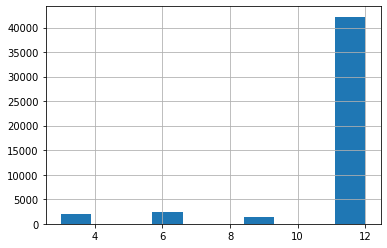

In [22]:
train['AP004'].hist()

In [25]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

In [9]:
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[var['source']=='AP']['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])

In [10]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [11]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_cst1lgp
  JVM stdout: /tmp/tmp_cst1lgp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_cst1lgp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_zuzxcs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Portion

In [14]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Whole Dataset

In [58]:
df_hex = h2o.H2OFrame(loan_data)
train_hex2 = h2o.H2OFrame(train)
test_hex2 = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## Part2: Data Cleaning: drop variable, compute NA, Encoding

Drop the time

In [126]:
loan_data2 = loan_data.drop('AP005',axis=1)

In [85]:
loan_data2.head(5)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,...,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,...,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,...,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,h5,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,...,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,android,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,...,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,h5,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,0,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


One hot encoding for variable "AP006"

In [127]:
dummies = pd.get_dummies(loan_data2['AP006'],dummy_na=True)
dummies.head()

,android,api,h5,ios,NaN
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [129]:
dummies.columns = ['AP006_android', 'AP006_api', 'AP006_h5','AP006_ios','AP006_nan']

In [131]:
loan_data3 = pd.concat([loan_data2, dummies], axis=1)

In [132]:
loan_data3.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002',
       'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022',
       'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044',
       'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004', 'CR005',
       'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023',
       'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072',
       'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114',
       'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131',
       'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160',
       'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173',
       'MB005', 'MB007', 'AP006_android', 'AP006_api', 'AP006_h5', 'AP006_ios',
       'AP006_nan'],
      dtype='object')

In [133]:
loan_data3 = loan_data3.drop(['AP006','AP006_nan'], axis=1)
loan_data3.head(4)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,...,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007,AP006_android,AP006_api,AP006_h5,AP006_ios
0,0,1,1,1,31,2,1,12,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,0,0,0,1
1,1,2,2,0,27,1,1,12,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB,0,0,1,0
2,2,3,3,0,33,1,4,12,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB,0,0,1,0
3,3,4,4,0,34,2,4,12,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO,1,0,0,0


WEIGHT OF EVIDENCE (WOE) ENCODING for variable "MB007"

In [97]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [134]:
ec = ce.WOEEncoder()
loan_data3['MB007'] = loan_data3['MB007'].fillna('NoData')
X = loan_data3['MB007']
y = loan_data3['loan_default']
X_WOE = ec.fit(X, y)
X_cleaned = ec.transform(X)
X_cleaned.round(2)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,MB007
0,-0.08
1,-0.04
2,-0.04
3,0.30
4,-0.04
...,...
79995,0.30
79996,-0.08
79997,0.29
79998,0.06


In [135]:
loan_data3 = loan_data3.drop('MB007', axis=1)

In [136]:
loan_data3 = pd.concat([loan_data3, X_cleaned], axis=1)

In [137]:
loan_data3.head(4)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,...,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,AP006_android,AP006_api,AP006_h5,AP006_ios,MB007
0,0,1,1,1,31,2,1,12,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,0,0,0,1,-0.078644
1,1,2,2,0,27,1,1,12,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,0,0,1,0,-0.039837
2,2,3,3,0,33,1,4,12,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,0,0,1,0,-0.039837
3,3,4,4,0,34,2,4,12,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,0,0,0,0.303513


Calculating the missing values 

In [147]:
# fill na with max
for i in loan_data3.columns:
  loan_data3[i] =  loan_data3[i].fillna(loan_data3[i].max())

Split the new data

In [149]:
train2, test2 = train_test_split(
     loan_data3, test_size=0.40, random_state=42)

In [150]:
train_smp2 = train2.sample(frac=0.1, random_state=1)
test_smp2 = test2.sample(frac=0.1, random_state=1)
train_hex22 = h2o.H2OFrame(train_smp2)
test_hex22 = h2o.H2OFrame(test_smp2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [151]:
train_hex222 = h2o.H2OFrame(train2)
test_hex222 = h2o.H2OFrame(test2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
target='loan_default'

In [157]:
var2 = pd.DataFrame(train2.dtypes).reset_index()
var2.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [158]:
var2.columns = ['varname','dtype'] 
var2['source'] = var2['varname'].str[:2]
var2.head()

,varname,dtype,source
0,Unnamed: 0,int64,Un
1,Unnamed: 0.1,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP


In [159]:
var2['source'].value_counts()

CD    36
TD    24
AP    11
CR     8
PA     6
Un     2
MB     2
lo     1
id     1
Name: source, dtype: int64

In [160]:
MB_list2 = list(var2[var2['source']=='MB']['varname'])
AP_list2 = list(var2[var2['source']=='AP']['varname'])
TD_list2 = list(var2[var2['source']=='TD']['varname'])
CR_list2 = list(var2[var2['source']=='CR']['varname'])
PA_list2 = list(var2[var2['source']=='PA']['varname'])
CD_list2 = list(var2[var2['source']=='CD']['varname'])

In [161]:
predictors2 = CR_list2 + TD_list2 + AP_list2 + MB_list2 + CR_list2 + PA_list2 

# Random Forest

In [35]:
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
RF_modl.train(predictors,target,training_frame=train_hex)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD048, AP005, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


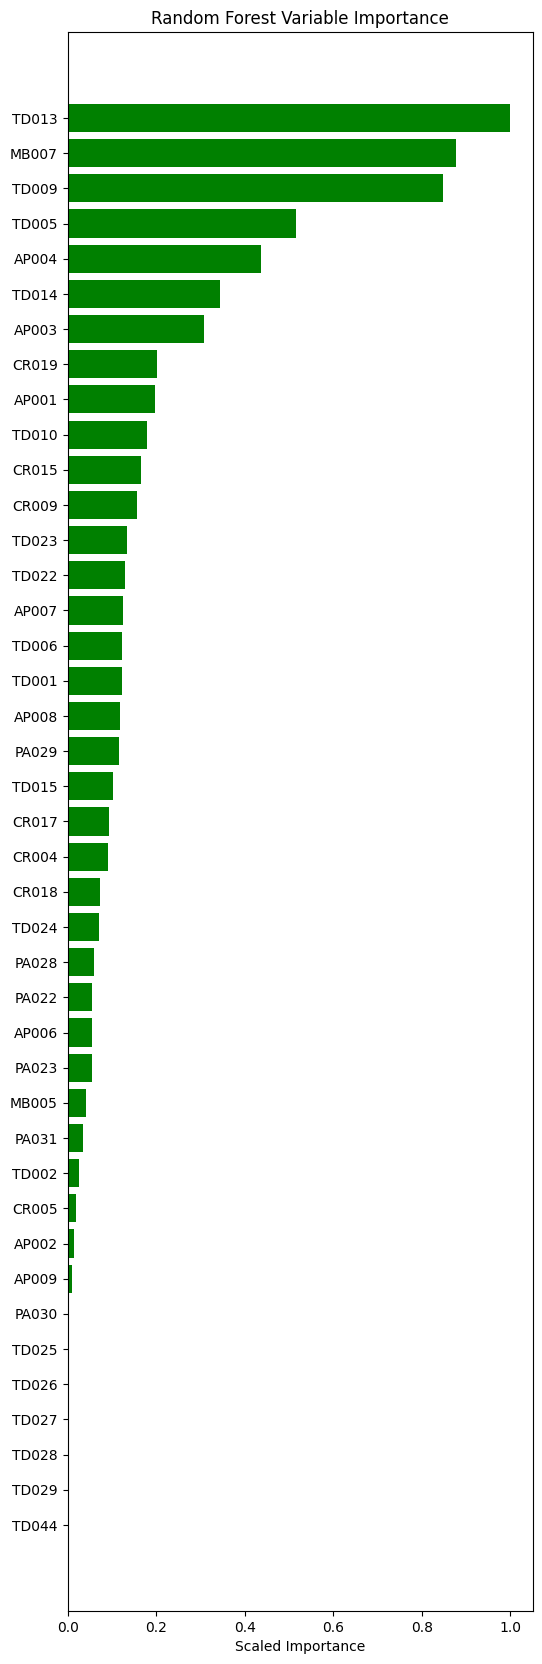

In [48]:
def VarImp(model_name,m_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title(m_name + ' Variable Importance')
    plt.show()
    
VarImp(RF_modl,'Random Forest')


In [16]:
def actual_predict(model,test_hex,target):
    y_pred = model.predict(test_hex).as_data_frame()
    y_actual = test_hex[target].as_data_frame()
    df_actual_predict = pd.concat([y_actual,y_pred],axis=1)
    df_actual_predict.columns = ['actual','pred']
    return(df_actual_predict)

In [45]:
RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [4G, HASEE, HTC, IPAD4, IVVI, KINGSUN, PROTRULY, SMARTISAN, YEPEN]
  warnings.warn(w)


,actual,pred
0,0,0.276288
1,0,0.158607
2,0,0.122370
3,0,0.225707
4,0,0.119219


In [17]:
def gains_table(df_actual_predict):
    df_actual_predict = df_actual_predict.sort_values(by='pred',ascending=False)
    df_actual_predict['row_id'] = range(0,0+len(df_actual_predict))
    
    df_actual_predict['decile'] = (df_actual_predict['row_id'] / (len(df_actual_predict)/10)).astype(int)
    df_actual_predict.loc[df_actual_predict['decile'] == 10] =9
    
    # Create gains table
    gains = df_actual_predict.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)

In [47]:
RF_gains = gains_table(RF_actual_predict)
RF_gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,113,207,320,113,207,0.19,0.08,60.0,1.88,11.0,35.31
1,320,93,227,640,206,434,0.34,0.17,120.0,1.72,17.0,32.19
2,320,75,245,960,281,679,0.47,0.26,180.0,1.56,21.0,29.27
3,320,65,255,1280,346,934,0.58,0.36,240.0,1.44,22.0,27.03
4,320,60,260,1600,406,1194,0.68,0.46,300.0,1.35,22.0,25.37
5,320,44,276,1920,450,1470,0.75,0.57,360.0,1.25,18.0,23.44
6,320,38,282,2240,488,1752,0.81,0.67,420.0,1.16,14.0,21.79
7,320,52,268,2560,540,2020,0.90,0.78,480.0,1.12,12.0,21.09
8,320,37,283,2880,577,2303,0.96,0.89,540.0,1.07,7.0,20.03


In [18]:
# ROC
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve


In [46]:
dd = RF_actual_predict
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.6473371794871795

In [19]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))

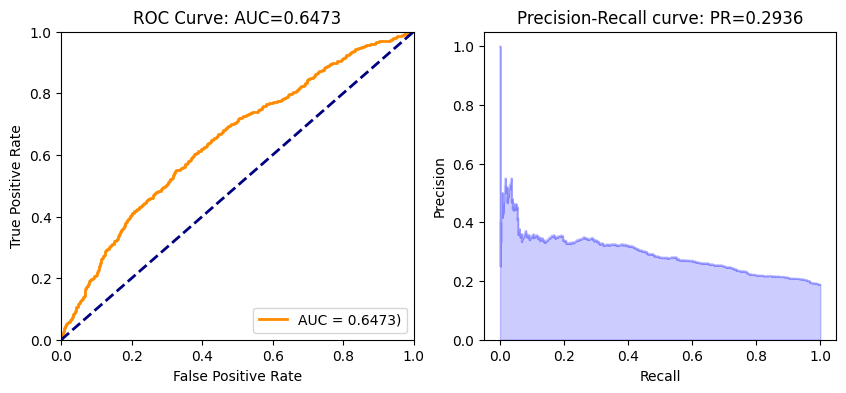

In [49]:
ROC_PR(RF_actual_predict)

Now the code works fine with the small dataset, we can model with the entire dataset

In [57]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_hex2)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [CR012, AP005]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [58]:
RF_actual_predict2 = actual_predict(rf_v2,test_hex2,target)
RF_actual_predict2.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [AND, ANDROID, APPLE, EYU, HASEE, HONGLAJIAO, IPAD3, KDDI, KINGSUN, MANN, MILAI, MLLED, MONEYMAKINGMACHINE, OUKI, PHILIPS, PROTRULY, RAMOS, REDGOO, SM-W2016, VOLTE, YEPEN]
  warnings.warn(w)


,actual,pred
0,0,0.121171
1,0,0.190274
2,0,0.110506
3,1,0.207747
4,0,0.471553


In [59]:
gains_table(RF_actual_predict2)

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1270,1930,3200,1270,1930,0.20,0.07,622.4,2.04,13.0,39.69
1,3200,984,2216,6400,2254,4146,0.36,0.16,1244.8,1.81,20.0,35.22
2,3200,806,2394,9600,3060,6540,0.49,0.25,1867.2,1.64,24.0,31.87
3,3200,740,2460,12800,3800,9000,0.61,0.35,2489.6,1.53,26.0,29.69
4,3200,620,2580,16000,4420,11580,0.71,0.45,3112.0,1.42,26.0,27.62
5,3200,514,2686,19200,4934,14266,0.79,0.55,3734.4,1.32,24.0,25.70
6,3200,463,2737,22400,5397,17003,0.87,0.66,4356.8,1.24,21.0,24.09
7,3200,388,2812,25600,5785,19815,0.93,0.77,4979.2,1.16,16.0,22.60
8,3200,275,2925,28800,6060,22740,0.97,0.88,5601.6,1.08,9.0,21.04


Random forest gives a 2.04 lift for the all dataset. The next step is to apply the concept of oversampling and undersampling, to test whether the predictability is enhanced

# Sampling

In [60]:
rf_v3 = H2ORandomForestEstimator(
        model_id = 'rf_v3',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        balance_classes = True,
        seed=1234)
rf_v3.train(predictors,target,training_frame=train_hex)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD048, AP005, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [63]:
RF_actual_predict3 = actual_predict(rf_v3,test_hex,target)
RF_actual_predict3.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [4G, HASEE, HTC, IPAD4, IVVI, KINGSUN, PROTRULY, SMARTISAN, YEPEN]
  warnings.warn(w)


,actual,pred
0,0,0.276288
1,0,0.158607
2,0,0.122370
3,0,0.225707
4,0,0.119219


In [64]:
gains_table(RF_actual_predict3)

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,113,207,320,113,207,0.19,0.08,60.0,1.88,11.0,35.31
1,320,93,227,640,206,434,0.34,0.17,120.0,1.72,17.0,32.19
2,320,75,245,960,281,679,0.47,0.26,180.0,1.56,21.0,29.27
3,320,65,255,1280,346,934,0.58,0.36,240.0,1.44,22.0,27.03
4,320,60,260,1600,406,1194,0.68,0.46,300.0,1.35,22.0,25.37
5,320,44,276,1920,450,1470,0.75,0.57,360.0,1.25,18.0,23.44
6,320,38,282,2240,488,1752,0.81,0.67,420.0,1.16,14.0,21.79
7,320,52,268,2560,540,2020,0.90,0.78,480.0,1.12,12.0,21.09
8,320,37,283,2880,577,2303,0.96,0.89,540.0,1.07,7.0,20.03


## Oversampling Techniques

In [67]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [203]:
# RandomOverSampler
# With over-sampling methods, the number of samples in a class
# should be greater or equal to the original number of samples.
sampler = RandomOverSampler(random_state=42)
X_rs, y_rs = sampler.fit_sample(X2, y)

In [186]:
df_ro = pd.concat([X_rs, y_rs],axis=1)
df_hex_ro = h2o.H2OFrame(df_ro)

train_ro,test_ro = train_test_split(df_ro,test_size=0.4,random_state=1234)
train_hex_ro = h2o.H2OFrame(train_ro)
test_hex_ro = h2o.H2OFrame(test_ro)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [190]:
train_smp_ro = train_ro.sample(frac=0.1, random_state=1)
test_smp_ro = test_ro.sample(frac=0.1, random_state=1)
train_hex_sam_ro = h2o.H2OFrame(train_smp_ro)
test_hex_sam_ro = h2o.H2OFrame(test_smp_ro)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [192]:
rf_v6 = H2ORandomForestEstimator(
        model_id = 'rf_v6',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v6.train(predictors2,target,training_frame=train_hex_sam_ro)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [193]:
RF_actual_predict6 = actual_predict(rf_v6,test_hex_sam_ro,target)
gains_table(RF_actual_predict6)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,517,391,126,517,391,126,0.15,0.05,257.9,1.52,10.0,75.63
1,516,348,168,1033,739,294,0.29,0.11,515.8,1.43,18.0,71.54
2,516,309,207,1549,1048,501,0.41,0.19,773.7,1.35,22.0,67.66
3,516,285,231,2065,1333,732,0.52,0.28,1031.6,1.29,24.0,64.55
4,516,281,235,2581,1614,967,0.63,0.37,1289.5,1.25,26.0,62.53
5,516,250,266,3097,1864,1233,0.72,0.48,1547.4,1.20,24.0,60.19
6,516,235,281,3613,2099,1514,0.81,0.59,1805.3,1.16,22.0,58.10
7,516,204,312,4129,2303,1826,0.89,0.71,2063.2,1.12,18.0,55.78
8,516,176,340,4645,2479,2166,0.96,0.84,2321.1,1.07,12.0,53.37


In [169]:
# SMOTE
sampler_smote = SMOTE(random_state=0)
X_rs_smote, y_rs_smote = sampler_smote.fit_sample(X2, y)
#plot_this(X_rs_smote, y_rs_smote,'Oversampling Using SMOTE')

In [197]:
df_smote = pd.concat([X_rs_smote, y_rs_smote],axis=1)
df_hex_smote = h2o.H2OFrame(df_smote)

train_smote,test_smote = train_test_split(df_smote,test_size=0.4,random_state=1234)
train_smp_smote = train_smote.sample(frac=0.1, random_state=1)
test_smp_smote = test_smote.sample(frac=0.1, random_state=1)
train_hex_sam_smote = h2o.H2OFrame(train_smp_smote)
test_hex_sam_smote = h2o.H2OFrame(test_smp_smote)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [195]:
rf_v7 = H2ORandomForestEstimator(
        model_id = 'rf_v7',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v7.train(predictors2,target,training_frame=train_hex_sam_smote)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [198]:
RF_actual_predict7 = actual_predict(rf_v7,test_hex_sam_smote,target)
gains_table(RF_actual_predict7)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,517,517,0,517,517,0,0.20,0.00,257.9,2.00,20.0,100.00
1,516,512,4,1033,1029,4,0.40,0.00,515.8,1.99,40.0,99.61
2,516,441,75,1549,1470,79,0.57,0.03,773.7,1.90,54.0,94.90
3,516,287,229,2065,1757,308,0.68,0.12,1031.6,1.70,56.0,85.08
4,516,248,268,2581,2005,576,0.78,0.22,1289.5,1.55,56.0,77.68
5,516,174,342,3097,2179,918,0.84,0.36,1547.4,1.41,48.0,70.36
6,516,151,365,3613,2330,1283,0.90,0.50,1805.3,1.29,40.0,64.49
7,516,104,412,4129,2434,1695,0.94,0.66,2063.2,1.18,28.0,58.95
8,516,85,431,4645,2519,2126,0.98,0.82,2321.1,1.09,16.0,54.23


In [170]:
# ADASYN
sampler_ada = ADASYN(random_state=0)
X_rs_ada, y_rs_ada = sampler.fit_sample(X2, y)
#plot_this(X_rs_ada, y_rs_ada,'Oversampling Using ADASYN')

In [199]:
df_ada = pd.concat([X_rs_ada, y_rs_ada],axis=1)
df_hex_ada = h2o.H2OFrame(df_ada)

train_ada,test_ada = train_test_split(df_ada,test_size=0.4,random_state=1234)
train_smp_ada = train_ada.sample(frac=0.1, random_state=1)
test_smp_ada = test_ada.sample(frac=0.1, random_state=1)
train_hex_sam_ada = h2o.H2OFrame(train_smp_ada)
test_hex_sam_ada = h2o.H2OFrame(test_smp_ada)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [200]:
rf_v8 = H2ORandomForestEstimator(
        model_id = 'rf_v8',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v8.train(predictors2,target,training_frame=train_hex_sam_ada)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [201]:
RF_actual_predict8 = actual_predict(rf_v8,test_hex_sam_ada,target)
gains_table(RF_actual_predict8)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,517,391,126,517,391,126,0.15,0.05,257.9,1.52,10.0,75.63
1,516,348,168,1033,739,294,0.29,0.11,515.8,1.43,18.0,71.54
2,516,309,207,1549,1048,501,0.41,0.19,773.7,1.35,22.0,67.66
3,516,285,231,2065,1333,732,0.52,0.28,1031.6,1.29,24.0,64.55
4,516,281,235,2581,1614,967,0.63,0.37,1289.5,1.25,26.0,62.53
5,516,250,266,3097,1864,1233,0.72,0.48,1547.4,1.20,24.0,60.19
6,516,235,281,3613,2099,1514,0.81,0.59,1805.3,1.16,22.0,58.10
7,516,204,312,4129,2303,1826,0.89,0.71,2063.2,1.12,18.0,55.78
8,516,176,340,4645,2479,2166,0.96,0.84,2321.1,1.07,12.0,53.37


## Undersampling

Using Make imbalance

In [204]:
y = loan_data[target]
X = loan_data.drop(target,axis=1)
y.dtypes

dtype('int64')

In [220]:
X2 = loan_data3.drop(target, axis = 1)

In [207]:
y1_cnt = loan_data[target].sum()
y1_cnt

15488

In [208]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

30976

In [39]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)

In [209]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y, 
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)  

In [210]:
y_rs = loan_data[loan_data[target]==1]
X_rs = loan_data[loan_data[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [211]:
rf_v4 = H2ORandomForestEstimator(
        model_id = 'rf_v4',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v4.train(predictors,target,training_frame=smpl_hex)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [CR012, TD062]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [30]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



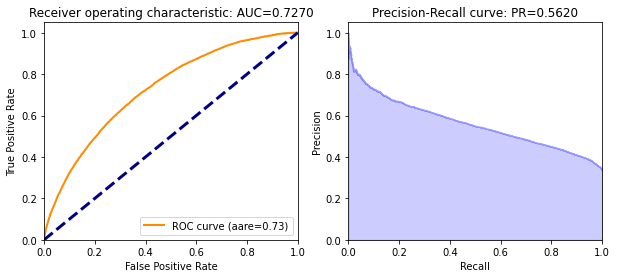

In [212]:
ROC_AUC(rf_v4,smpl_hex,'loan_default')

In [ ]:
RF_actual_predict4 = actual_predict(rf_v4,test_hex,target)
RF_actual_predict4.head()

In [37]:
gains_table(RF_actual_predict4)

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,127,193,320,127,193,0.21,0.07,60.0,2.12,14.0,39.69
1,320,108,212,640,235,405,0.39,0.16,120.0,1.96,23.0,36.72
2,320,75,245,960,310,650,0.52,0.25,180.0,1.72,27.0,32.29
3,320,79,241,1280,389,891,0.65,0.34,240.0,1.62,31.0,30.39
4,320,63,257,1600,452,1148,0.75,0.44,300.0,1.51,31.0,28.25
5,320,56,264,1920,508,1412,0.85,0.54,360.0,1.41,31.0,26.46
6,320,34,286,2240,542,1698,0.90,0.65,420.0,1.29,25.0,24.20
7,320,31,289,2560,573,1987,0.96,0.76,480.0,1.19,20.0,22.38
8,320,20,300,2880,593,2287,0.99,0.88,540.0,1.10,11.0,20.59


Other Undersampling Techniques

1. Random UnderSampler
 - Using raw data





In [215]:
# RandomUnderSampler
sampler = RandomUnderSampler()
X_rs_ru, y_rs_ru = sampler.fit_sample(X, y)
#plot_this(X_rs,y_rs,'Random undersampling')

In [223]:
df_ru1 = pd.concat([X_rs_ru, y_rs_ru],axis=1)
df_hex_ru1 = h2o.H2OFrame(df_ru1)

train_ru1,test_ru1 = train_test_split(df_ru1,test_size=0.4,random_state=1234)
train_smp_ru1 = train_ru1.sample(frac=0.1, random_state=1)
test_smp_ru1 = test_ru1.sample(frac=0.1, random_state=1)
train_hex_sam_ru1 = h2o.H2OFrame(train_smp_ru1)
test_hex_sam_ru1 = h2o.H2OFrame(test_smp_ru1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [224]:
rf_v9 = H2ORandomForestEstimator(
        model_id = 'rf_v9',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v9.train(predictors,target,training_frame=train_hex_sam_ru1)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD048, AP005, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [225]:
RF_actual_predict9 = actual_predict(rf_v9,test_hex_sam_ru1,target)
gains_table(RF_actual_predict9)

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [CMCC, DOOV, MOTOROLA, QIKU, RAMOS, SMARTISAN, SUGAR]
  warnings.warn(w)


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,124,92,32,124,92,32,0.15,0.05,60.9,1.51,10.0,74.19
1,124,76,48,248,168,80,0.28,0.13,121.8,1.38,15.0,67.74
2,124,75,49,372,243,129,0.40,0.20,182.7,1.33,20.0,65.32
3,124,63,61,496,306,190,0.50,0.30,243.6,1.26,20.0,61.69
4,124,66,58,620,372,248,0.61,0.39,304.5,1.22,22.0,60.00
5,124,53,71,744,425,319,0.70,0.51,365.4,1.16,19.0,57.12
6,124,63,61,868,488,380,0.80,0.60,426.3,1.14,20.0,56.22
7,124,47,77,992,535,457,0.88,0.73,487.2,1.10,15.0,53.93
8,124,45,79,1116,580,536,0.95,0.85,548.1,1.06,10.0,51.97


1. Random UnderSampler
 - Using cleaned data

In [226]:
# RandomUnderSampler
sampler = RandomUnderSampler()
X_rs_ru2, y_rs_ru2 = sampler.fit_sample(X2, y)
#plot_this(X_rs,y_rs,'Random undersampling')

In [227]:
df_ru2 = pd.concat([X_rs_ru2, y_rs_ru2],axis=1)
df_hex_ru2 = h2o.H2OFrame(df_ru2)

train_ru2,test_ru2 = train_test_split(df_ru2,test_size=0.4,random_state=1234)
train_smp_ru2 = train_ru2.sample(frac=0.1, random_state=1)
test_smp_ru2 = test_ru2.sample(frac=0.1, random_state=1)
train_hex_sam_ru2 = h2o.H2OFrame(train_smp_ru2)
test_hex_sam_ru2 = h2o.H2OFrame(test_smp_ru2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [228]:
rf_v10 = H2ORandomForestEstimator(
        model_id = 'rf_v10',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v10.train(predictors2,target,training_frame=train_hex_sam_ru2)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [229]:
RF_actual_predict10 = actual_predict(rf_v10,test_hex_sam_ru2,target)
gains_table(RF_actual_predict10)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,124,82,42,124,82,42,0.13,0.07,60.9,1.35,6.0,66.13
1,124,74,50,248,156,92,0.26,0.15,121.8,1.28,11.0,62.90
2,124,77,47,372,233,139,0.38,0.22,182.7,1.28,16.0,62.63
3,124,68,56,496,301,195,0.49,0.31,243.6,1.24,18.0,60.69
4,124,68,56,620,369,251,0.61,0.40,304.5,1.21,21.0,59.52
5,124,59,65,744,428,316,0.70,0.50,365.4,1.17,20.0,57.53
6,124,55,69,868,483,385,0.79,0.61,426.3,1.13,18.0,55.65
7,124,49,75,992,532,460,0.87,0.73,487.2,1.09,14.0,53.63
8,124,45,79,1116,577,539,0.95,0.86,548.1,1.05,9.0,51.70


This is even worse than using the raw data

2. Near Miss

In [221]:
# NearMiss
sampler = NearMiss()
X_rs_nm, y_rs_nm = sampler.fit_sample(X2, y)
#plot_this(X_rs,y_rs,'NearMiss')

In [230]:
df_nm = pd.concat([X_rs_nm, y_rs_nm],axis=1)
df_hex_nm = h2o.H2OFrame(df_nm)

train_nm,test_nm = train_test_split(df_nm,test_size=0.4,random_state=1234)
train_smp_nm = train_nm.sample(frac=0.1, random_state=1)
test_smp_nm = test_nm.sample(frac=0.1, random_state=1)
train_hex_sam_nm = h2o.H2OFrame(train_smp_nm)
test_hex_sam_nm = h2o.H2OFrame(test_smp_nm)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [231]:
rf_v11 = H2ORandomForestEstimator(
        model_id = 'rf_v11',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v11.train(predictors2,target,training_frame=train_hex_sam_nm)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [232]:
RF_actual_predict11 = actual_predict(rf_v11,test_hex_sam_nm,target)
gains_table(RF_actual_predict11)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,124,108,16,124,108,16,0.18,0.03,60.9,1.77,15.0,87.10
1,124,86,38,248,194,54,0.32,0.09,121.8,1.59,23.0,78.23
2,124,79,45,372,273,99,0.45,0.16,182.7,1.49,29.0,73.39
3,124,60,64,496,333,163,0.55,0.26,243.6,1.37,29.0,67.14
4,124,67,57,620,400,220,0.66,0.35,304.5,1.31,31.0,64.52
5,124,61,63,744,461,283,0.76,0.45,365.4,1.26,31.0,61.96
6,124,51,73,868,512,356,0.84,0.57,426.3,1.20,27.0,58.99
7,124,44,80,992,556,436,0.91,0.69,487.2,1.14,22.0,56.05
8,124,33,91,1116,589,527,0.97,0.84,548.1,1.07,13.0,52.78


3. TomekLinks

In [237]:
sampler = TomekLinks()
X_rs, y_rs = sampler.fit_sample(X2, y)

In [238]:
df_tl = pd.concat([X_rs, y_rs],axis=1)
df_hex_tl = h2o.H2OFrame(df_tl)

train_tl,test_tl = train_test_split(df_tl,test_size=0.4,random_state=1234)
train_smp_tl = train_tl.sample(frac=0.1, random_state=1)
test_smp_tl = test_tl.sample(frac=0.1, random_state=1)
train_hex_sam_tl = h2o.H2OFrame(train_smp_tl)
test_hex_sam_tl = h2o.H2OFrame(test_smp_tl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [239]:
rf_v12 = H2ORandomForestEstimator(
        model_id = 'rf_v12',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v12.train(predictors2,target,training_frame=train_hex_sam_tl)


/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [240]:
RF_actual_predict12 = actual_predict(rf_v12,test_hex_sam_tl,target)
gains_table(RF_actual_predict12)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,296,122,174,296,122,174,0.20,0.07,61.4,1.99,13.0,41.22
1,296,93,203,592,215,377,0.35,0.16,122.8,1.75,19.0,36.32
2,296,79,217,888,294,594,0.48,0.25,184.2,1.60,23.0,33.11
3,296,62,234,1184,356,828,0.58,0.35,245.6,1.45,23.0,30.07
4,295,55,240,1479,411,1068,0.67,0.46,307.0,1.34,21.0,27.79
5,296,63,233,1775,474,1301,0.77,0.56,368.4,1.29,21.0,26.70
6,296,37,259,2071,511,1560,0.83,0.67,429.8,1.19,16.0,24.67
7,296,34,262,2367,545,1822,0.89,0.78,491.2,1.11,11.0,23.02
8,296,40,256,2663,585,2078,0.95,0.89,552.6,1.06,6.0,21.97


4. NeighbourhoodCleaningRule

In [ ]:
sampler = NeighbourhoodCleaningRule()
X_rs_ncr, y_rs_ncr = sampler.fit_sample(X2, y)

In [243]:
df_ncr = pd.concat([X_rs_ncr, y_rs_ncr],axis=1)
df_hex_ncr = h2o.H2OFrame(df_ncr)

train_ncr,test_ncr = train_test_split(df_ncr,test_size=0.4,random_state=1234)
train_smp_ncr = train_ncr.sample(frac=0.1, random_state=1)
test_smp_ncr = test_ncr.sample(frac=0.1, random_state=1)
train_hex_sam_ncr = h2o.H2OFrame(train_smp_ncr)
test_hex_sam_ncr = h2o.H2OFrame(test_smp_ncr)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [244]:
rf_v13 = H2ORandomForestEstimator(
        model_id = 'rf_v13',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v13.train(predictors2,target,training_frame=train_hex_sam_ncr)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [246]:
RF_actual_predict13 = actual_predict(rf_v13,test_hex_sam_ncr,target)
gains_table(RF_actual_predict13)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,204,106,98,204,106,98,0.17,0.07,63.8,1.66,10.0,51.96
1,203,91,112,407,197,210,0.31,0.15,127.6,1.54,16.0,48.40
2,204,73,131,611,270,341,0.42,0.24,191.4,1.41,18.0,44.19
3,203,78,125,814,348,466,0.55,0.33,255.2,1.36,22.0,42.75
4,204,60,144,1018,408,610,0.64,0.44,319.0,1.28,20.0,40.08
5,203,66,137,1221,474,747,0.74,0.53,382.8,1.24,21.0,38.82
6,204,55,149,1425,529,896,0.83,0.64,446.6,1.18,19.0,37.12
7,203,39,164,1628,568,1060,0.89,0.76,510.4,1.11,13.0,34.89
8,204,42,162,1832,610,1222,0.96,0.87,574.2,1.06,9.0,33.30


After testing different sampling methods, the one with the highest lift value 2.12 is use make_imbalance function to do a undersampling, with a ROC score 0.73. Clearly, since the mortgage dataset is unbalanced, using undersampling method to under-sampling the majority of the class improves the model predictability.

Limitation: Keep all the variables, instead of conducting feature selections when cleaning the data. Moving forward, if only select e.g. top 15 features, the lift score could be higher and the running time will be reduced as well